In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [520]:
data=pd.read_csv('Placement_Data_Full_Class.csv')

In [521]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [522]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [523]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [524]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [525]:
#Dropping the unnecessary column serial number
data=data.drop(['sl_no'],axis=1)

In [526]:
# Storing categorical feature in a list 
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
cat_features

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [527]:
#Storing the numerical features in another list
num_feature=[feature for feature in data.columns if data[feature].dtypes!='O']
num_feature

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [528]:
print(len(cat_features),len(num_feature))

8 6


In [529]:
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#### _REMARK:-THERE ARE MISSING VALUES ONLY IN SALARY i.e of  NUMERIC DATATYPE_

#### _REMARK:-NO MISSING VALUES IN CATEGORICAL FEATURE_

# 1. __EDA (Exploratory Data Analysis)__

#### __Finding the outliers__

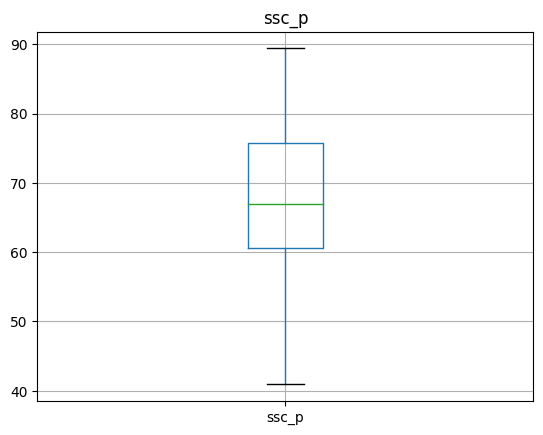

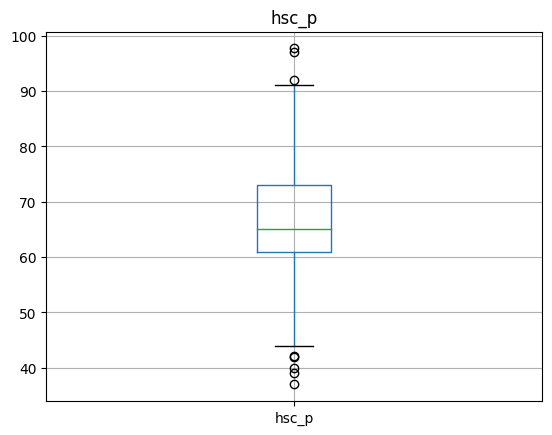

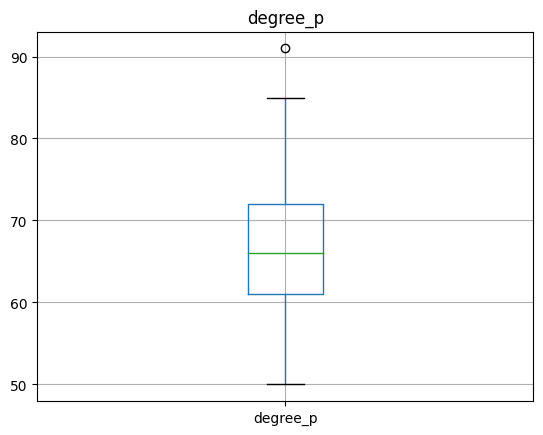

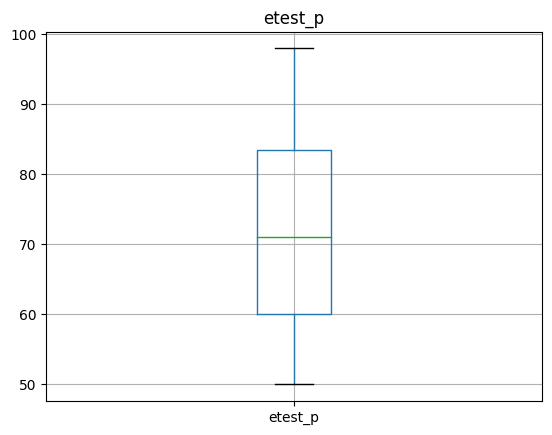

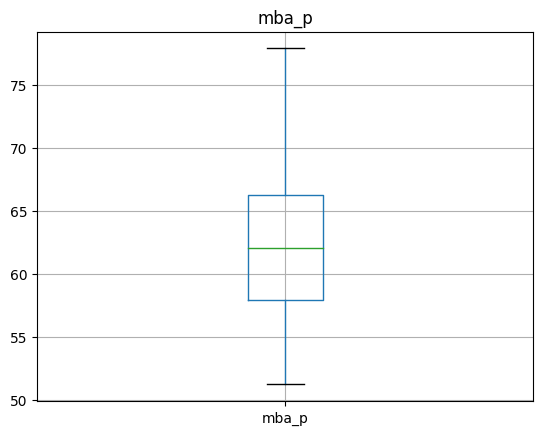

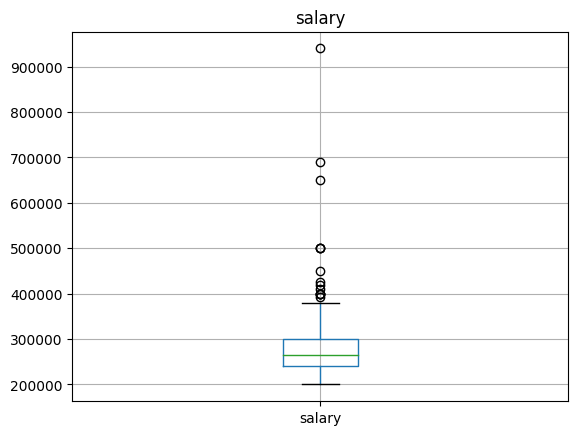

In [530]:
for i in num_feature:
    data.boxplot(i)
    plt.title(i)
    plt.show()

#### __Bar Graph__

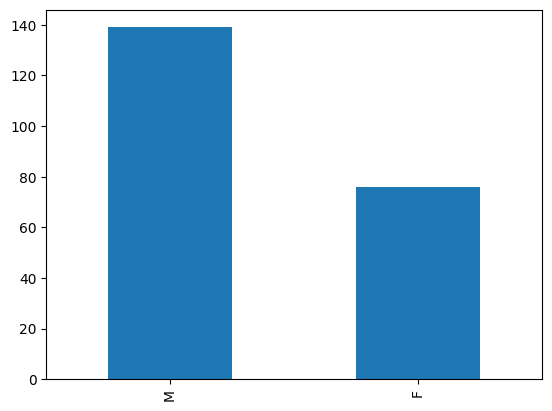

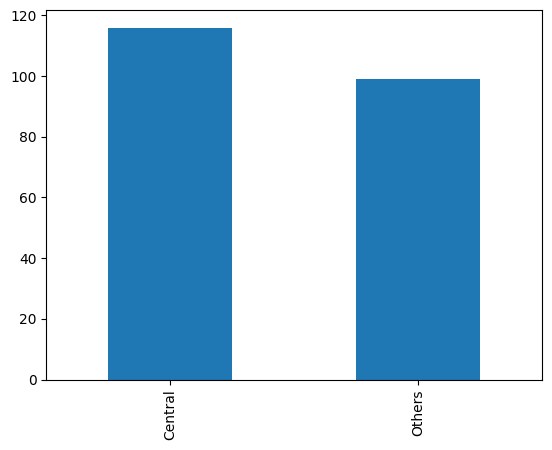

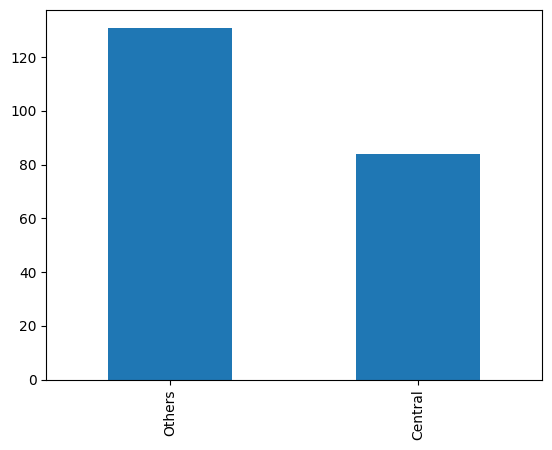

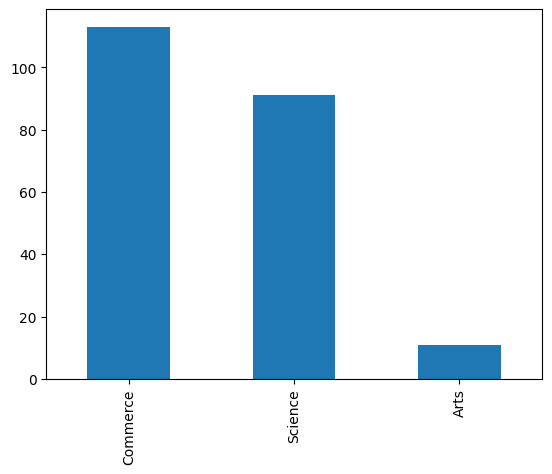

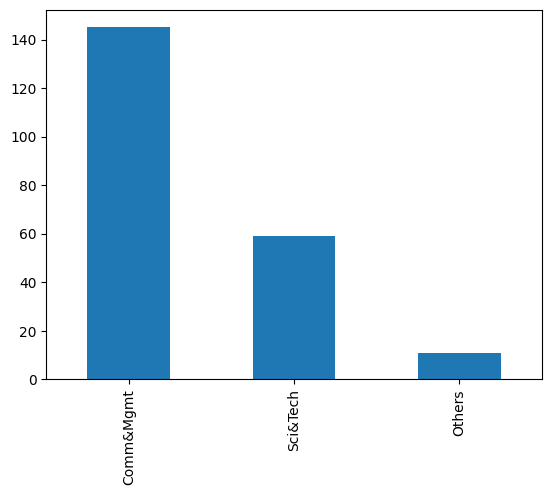

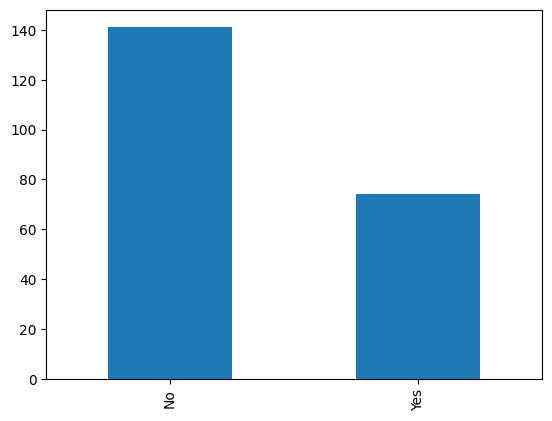

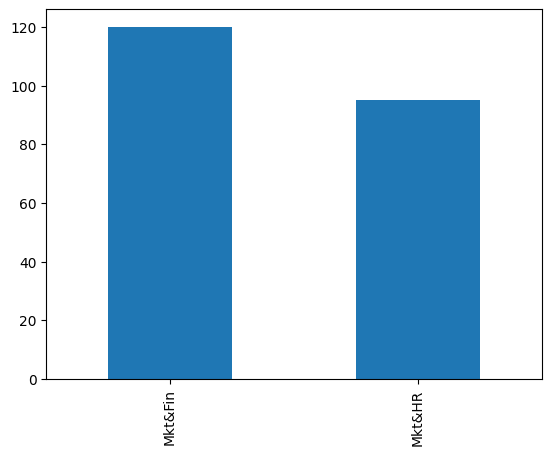

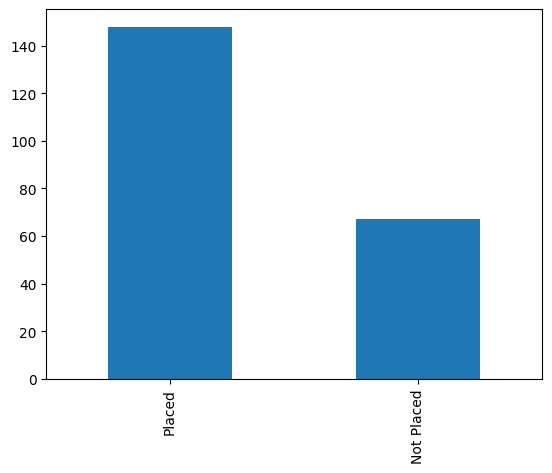

In [531]:
for i in cat_features:
    data[i].value_counts().plot(kind='bar')
    plt.show()

In [532]:
for i in cat_features:
    print(data[i].unique())


['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [533]:
for i in cat_features:
    print(data[i].value_counts())

M    139
F     76
Name: gender, dtype: int64
Central    116
Others      99
Name: ssc_b, dtype: int64
Others     131
Central     84
Name: hsc_b, dtype: int64
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
No     141
Yes     74
Name: workex, dtype: int64
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
Placed        148
Not Placed     67
Name: status, dtype: int64


#### __Checking for the normal distribution of the features in dataset__

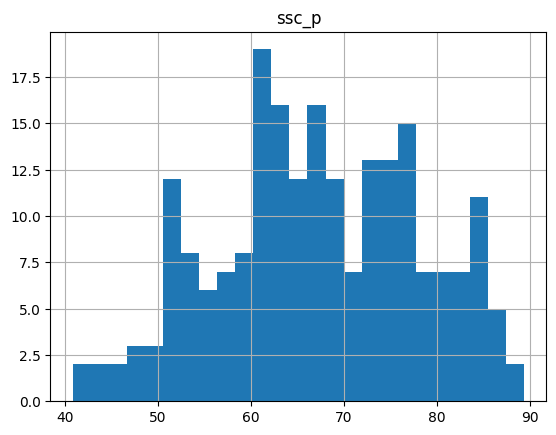

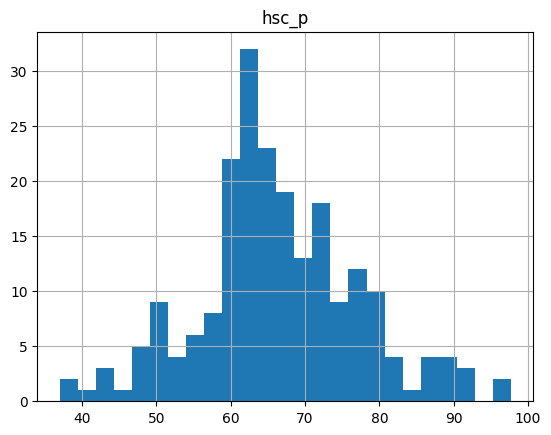

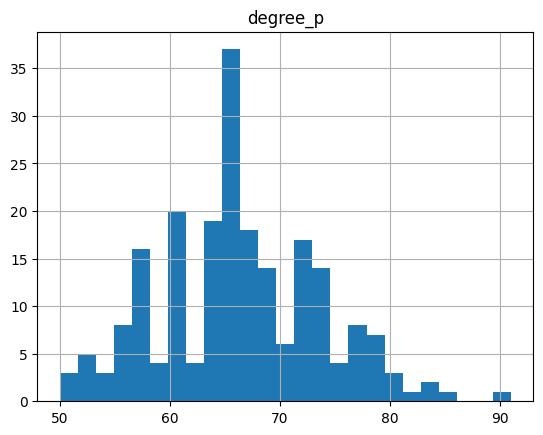

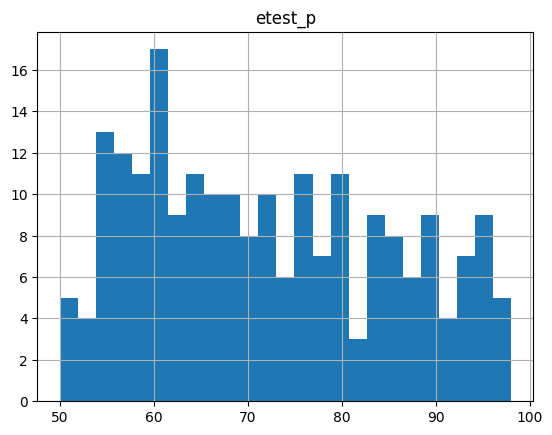

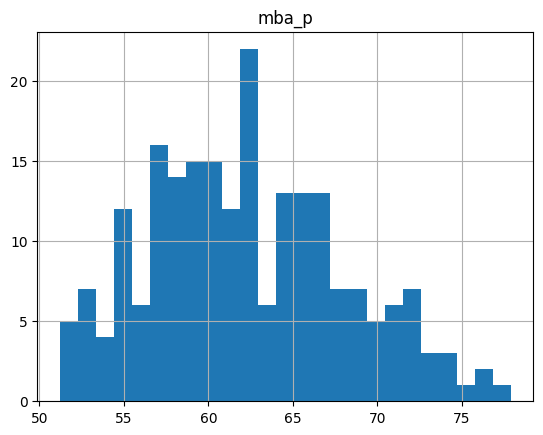

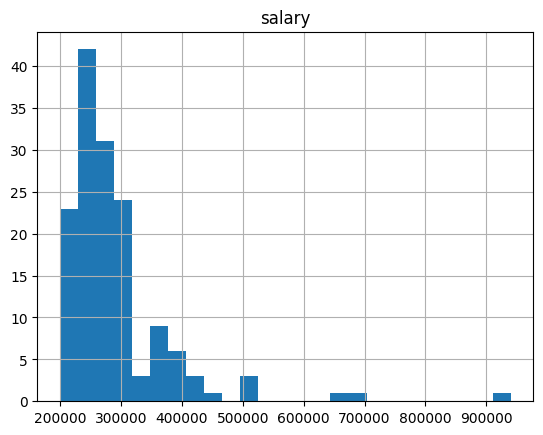

In [534]:
# sns.countplot(x=data['status'],hue=data['workex'])
# np.where(data['workex'].value_counts().unique()
for i in num_feature:
    data[i].hist(bins=25)
    plt.title(i)
    plt.show()

In [535]:
data.corr

<bound method DataFrame.corr of     gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0        M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1        M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2        M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3        M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4        M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
5        M  55.00   Others  49.80   Others   Science     67.25   Sci&Tech   
6        F  46.00   Others  49.20   Others  Commerce     79.00  Comm&Mgmt   
7        M  82.00  Central  64.00  Central   Science     66.00   Sci&Tech   
8        M  73.00  Central  79.00  Central  Commerce     72.00  Comm&Mgmt   
9        M  58.00  Central  70.00  Central  Commerce     61.00  Comm&Mgmt   
10       M  58.00  Central  61.00  Central  Commerce     60.00  Comm&Mgmt   
11       M  69.60  Central  68.40  Central  

#### __Checking for the skewness__

In [536]:
from scipy import stats
from scipy.stats import norm

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

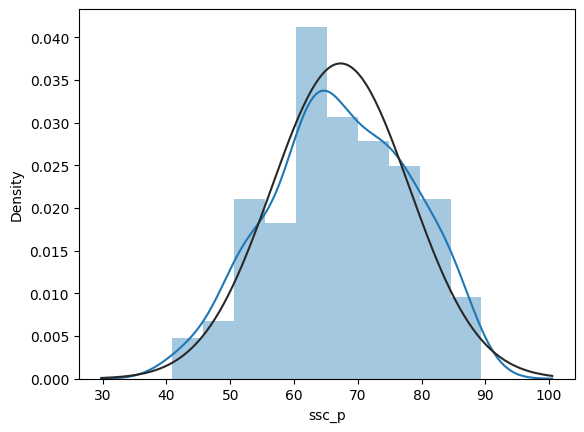

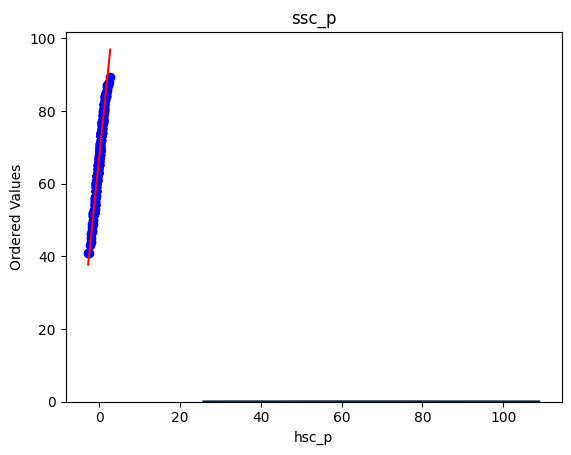

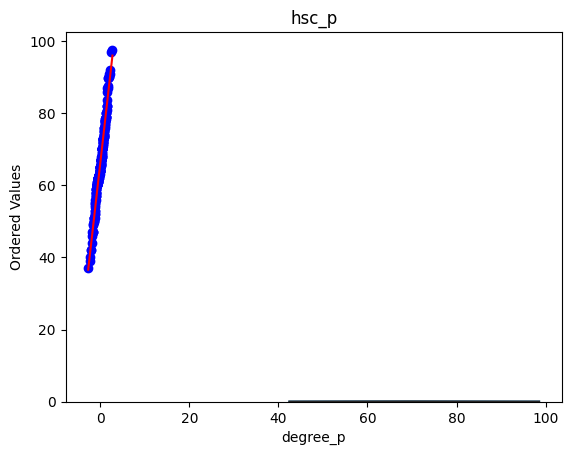

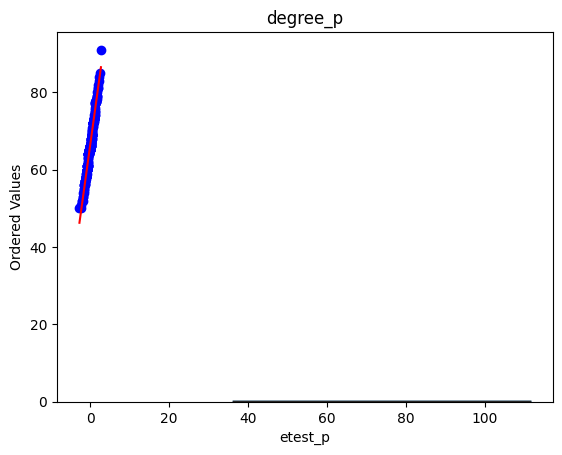

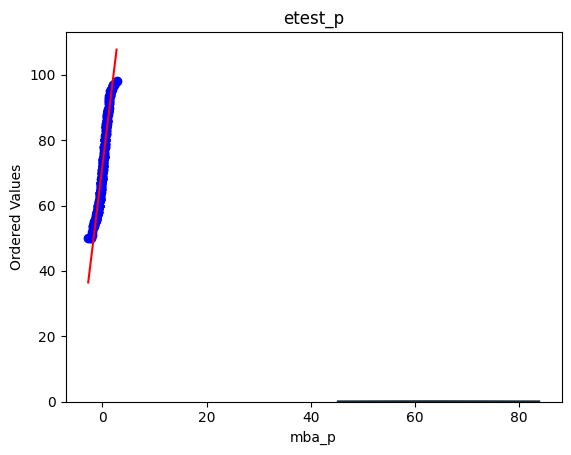

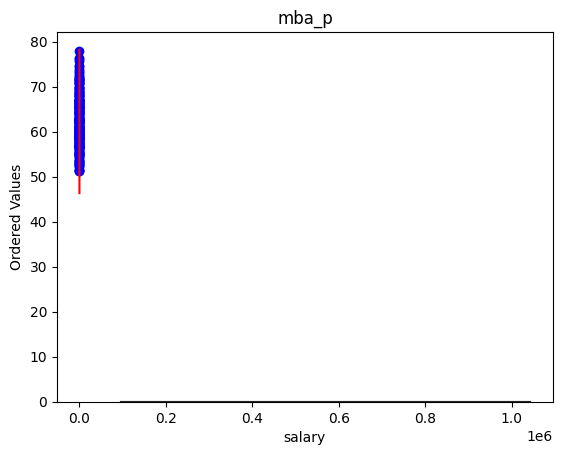

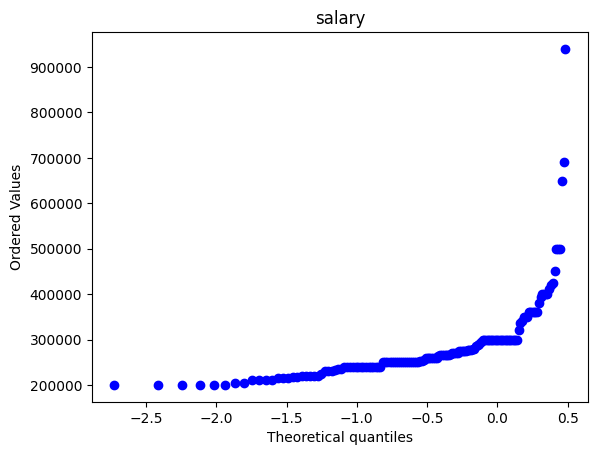

In [537]:
for i in num_feature:
    sns.distplot(data[i],fit=norm)
    fig=plt.figure()
    res = stats.probplot(data[i],plot=plt)
    plt.title(i)

In [538]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


#### __Exploring more about the dataset__

In [539]:
data['degree_t'].value_counts().unique()

array([145,  59,  11], dtype=int64)

In [540]:
data.query('status=="Not Placed" and workex == "Yes"').shape

(10, 14)

In [541]:
data.query('status=="Not Placed" and degree_t=="Sci&Tech"' ).shape

(18, 14)

#### __Bar Graph in between the target variable and the other features__

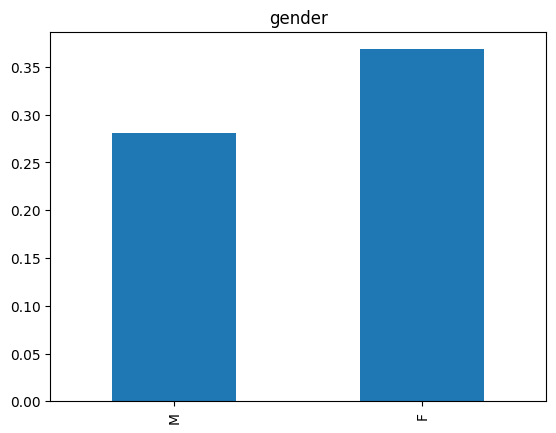

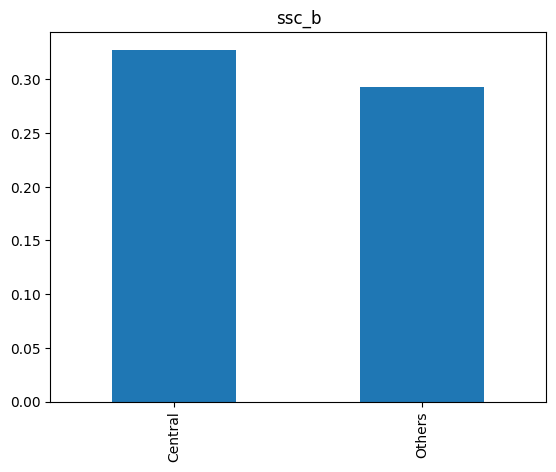

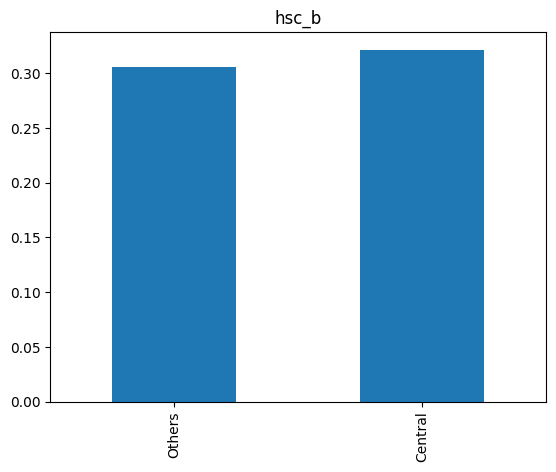

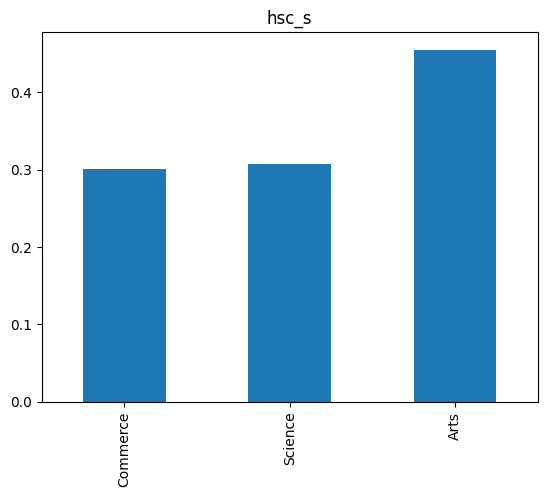

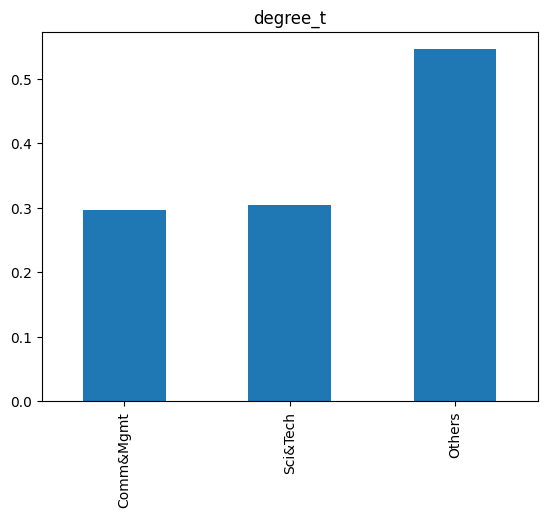

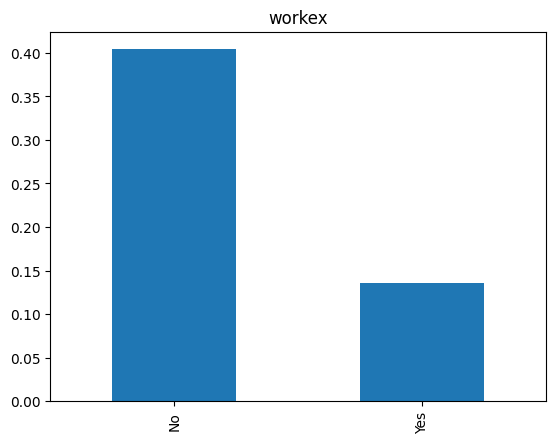

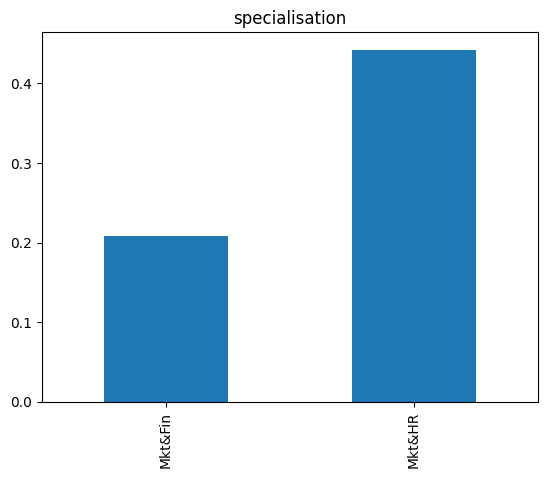

In [542]:
cont_var=['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary','status']
for column in data:
    if column not in cont_var:
        plt.figure()
        (data.query('status=="Not Placed"')[column].value_counts()/data[column].value_counts()).plot(kind='bar')
        plt.title(column)

#### __CounterPlot To find the relation__ 

Text(0.5, 1.0, 'Gender Vs Placement status')

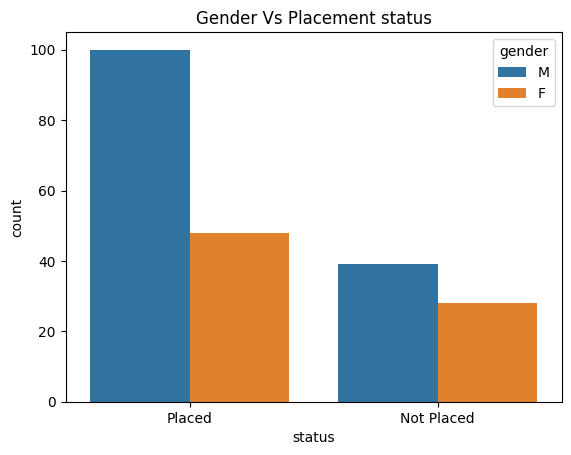

In [543]:
sns.countplot(data=data, x="status", hue="gender")
plt.title("Gender Vs Placement status")

#### __Pairplot to visualise all the important feature at once__

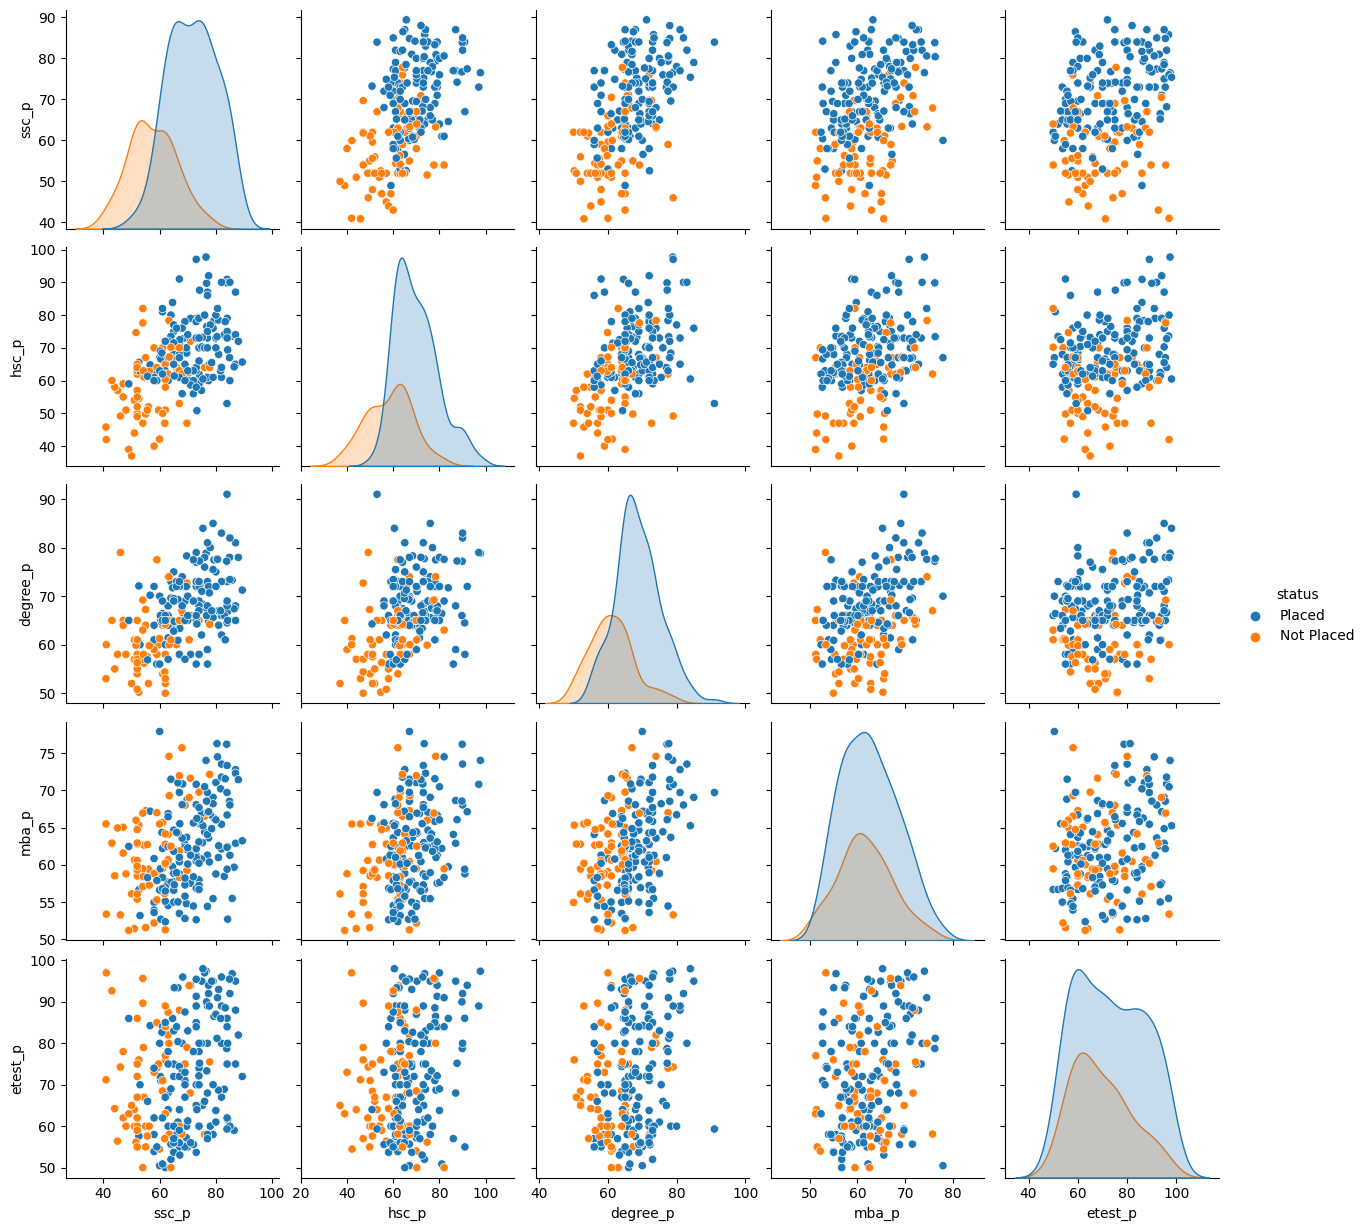

In [544]:
sns.pairplot(data,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

#### __Finding Correlation__

<AxesSubplot:>

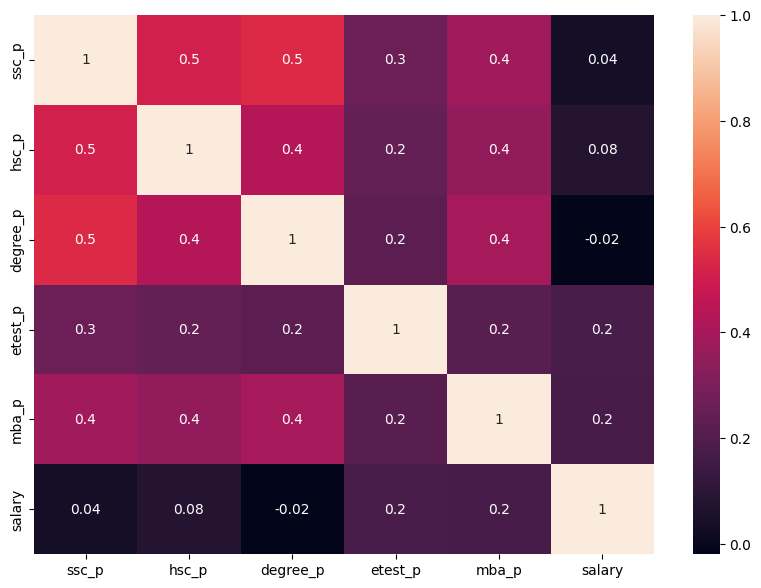

In [545]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,fmt='.1g')

# 2. __Feature Engineering__

In [546]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [547]:
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#### __Handling the categorical features__
#### __One Hot Encoding__

In [548]:
cat_features

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [549]:
cat_features2=cat_features[:7]
cat_features2

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

In [550]:
dataset=data.copy()
dataset=dataset.drop(['status'],axis=1)

In [551]:
df=pd.get_dummies(dataset,cat_features2)
df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.00,58.80,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.50,66.28,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,65.00,68.00,64.00,75.00,57.80,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,56.00,52.00,52.00,66.00,59.43,NaN,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,85.80,73.60,73.30,96.80,55.50,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
5,55.00,49.80,67.25,55.00,51.58,NaN,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0
6,46.00,49.20,79.00,74.28,53.29,NaN,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0
7,82.00,64.00,66.00,67.00,62.14,252000.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0
8,73.00,79.00,72.00,91.34,61.29,231000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
9,58.00,70.00,61.00,54.00,52.21,NaN,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0


In [552]:
data=pd.concat([data,df],axis=1)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,56.00,52.00,52.00,66.0,59.43,NaN,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0


In [553]:
data.shape

(215, 36)

In [554]:
data.dtypes

gender                     object
ssc_p                     float64
ssc_b                      object
hsc_p                     float64
hsc_b                      object
hsc_s                      object
degree_p                  float64
degree_t                   object
workex                     object
etest_p                   float64
specialisation             object
mba_p                     float64
status                     object
salary                    float64
ssc_p                     float64
hsc_p                     float64
degree_p                  float64
etest_p                   float64
mba_p                     float64
salary                    float64
gender_F                    uint8
gender_M                    uint8
ssc_b_Central               uint8
ssc_b_Others                uint8
hsc_b_Central               uint8
hsc_b_Others                uint8
hsc_s_Arts                  uint8
hsc_s_Commerce              uint8
hsc_s_Science               uint8
degree_t_Comm&

In [555]:
data=data.T.drop_duplicates().T

In [556]:
pd.set_option('display.max_columns', None)


In [557]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,M,65.0,Central,68.0,Central,Arts,64.0,Comm&Mgmt,No,75.0,Mkt&Fin,57.8,Placed,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,M,56.0,Central,52.0,Central,Science,52.0,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin,55.5,Placed,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0


In [558]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,M,65.0,Central,68.0,Central,Arts,64.0,Comm&Mgmt,No,75.0,Mkt&Fin,57.8,Placed,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,M,56.0,Central,52.0,Central,Science,52.0,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,M,85.8,Central,73.6,Central,Commerce,73.3,Comm&Mgmt,No,96.8,Mkt&Fin,55.5,Placed,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
5,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NaN,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0
6,F,46.0,Others,49.2,Others,Commerce,79.0,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0
7,M,82.0,Central,64.0,Central,Science,66.0,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0
8,M,73.0,Central,79.0,Central,Commerce,72.0,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
9,M,58.0,Central,70.0,Central,Commerce,61.0,Comm&Mgmt,No,54.0,Mkt&Fin,52.21,Not Placed,NaN,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0


#### __Dropping the features that are not important now (After one hot encoding)__ 

In [559]:
data=data.drop(cat_features2,axis=1)

In [560]:
data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.0,91.0,58.0,55.0,58.8,Placed,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,Placed,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,65.0,68.0,64.0,75.0,57.8,Placed,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,56.0,52.0,52.0,66.0,59.43,Not Placed,NaN,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,85.8,73.6,73.3,96.8,55.5,Placed,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
5,55.0,49.8,67.25,55.0,51.58,Not Placed,NaN,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0
6,46.0,49.2,79.0,74.28,53.29,Not Placed,NaN,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0
7,82.0,64.0,66.0,67.0,62.14,Placed,252000.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0
8,73.0,79.0,72.0,91.34,61.29,Placed,231000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
9,58.0,70.0,61.0,54.0,52.21,Not Placed,NaN,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0


#### __Handling missing value in the numerical feature 'salary'__

In [561]:
data['salary'].fillna(0,inplace=True)


In [562]:
data.head(100)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,67.0,91.0,58.0,55.0,58.8,Placed,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,Placed,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,65.0,68.0,64.0,75.0,57.8,Placed,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,56.0,52.0,52.0,66.0,59.43,Not Placed,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,85.8,73.6,73.3,96.8,55.5,Placed,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
5,55.0,49.8,67.25,55.0,51.58,Not Placed,0.0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0
6,46.0,49.2,79.0,74.28,53.29,Not Placed,0.0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0
7,82.0,64.0,66.0,67.0,62.14,Placed,252000.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0
8,73.0,79.0,72.0,91.34,61.29,Placed,231000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
9,58.0,70.0,61.0,54.0,52.21,Not Placed,0.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0


#### __Typecasting the target variable from String to Integer__ 

In [563]:
data['Target_status']=np.where(data['status']=='Placed',1,0)

In [564]:
data.head(10)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,Target_status
0,67.0,91.0,58.0,55.0,58.8,Placed,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.48,86.5,66.28,Placed,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,65.0,68.0,64.0,75.0,57.8,Placed,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1
3,56.0,52.0,52.0,66.0,59.43,Not Placed,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0
4,85.8,73.6,73.3,96.8,55.5,Placed,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1
5,55.0,49.8,67.25,55.0,51.58,Not Placed,0.0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0
6,46.0,49.2,79.0,74.28,53.29,Not Placed,0.0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
7,82.0,64.0,66.0,67.0,62.14,Placed,252000.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1
8,73.0,79.0,72.0,91.34,61.29,Placed,231000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1
9,58.0,70.0,61.0,54.0,52.21,Not Placed,0.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0


In [565]:
data=data.drop(['status'],axis=1)

In [566]:
data.head(10)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,Target_status
0,67.0,91.0,58.0,55.0,58.8,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1
1,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,65.0,68.0,64.0,75.0,57.8,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1
3,56.0,52.0,52.0,66.0,59.43,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0
4,85.8,73.6,73.3,96.8,55.5,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1
5,55.0,49.8,67.25,55.0,51.58,0.0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0
6,46.0,49.2,79.0,74.28,53.29,0.0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0
7,82.0,64.0,66.0,67.0,62.14,252000.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1
8,73.0,79.0,72.0,91.34,61.29,231000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1
9,58.0,70.0,61.0,54.0,52.21,0.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0


In [567]:
data.isnull().sum()

ssc_p                     0
hsc_p                     0
degree_p                  0
etest_p                   0
mba_p                     0
salary                    0
gender_F                  0
gender_M                  0
ssc_b_Central             0
ssc_b_Others              0
hsc_b_Central             0
hsc_b_Others              0
hsc_s_Arts                0
hsc_s_Commerce            0
hsc_s_Science             0
degree_t_Comm&Mgmt        0
degree_t_Others           0
degree_t_Sci&Tech         0
workex_No                 0
workex_Yes                0
specialisation_Mkt&Fin    0
specialisation_Mkt&HR     0
Target_status             0
dtype: int64

# 3. __Feature Selection__
#### _As the dataset is small it may overfit so to avoid that feature selection is required_ 

In [568]:
y_Train=data['Target_status']
x_Train=data.drop(['Target_status'],axis=1)


In [569]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [570]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(x_Train,y_Train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [571]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True, False, False, False])

In [572]:
selcted_feat=x_Train.columns[(feature_sel_model.get_support())]

#print the total and slected features
print('total features {}'.format(x_Train.shape[1]))
print('selected features {}'.format(len(selcted_feat)))
#alll the feature that are not necessary so for there coeffecient is made to zero by lasso regression
print('feature with coefficients shrank  to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_==0)))

total features 22
selected features 9
feature with coefficients shrank  to zero: 12


In [573]:
x_Train=x_Train[selcted_feat]
x_Train.head(10)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,hsc_s_Commerce,degree_t_Comm&Mgmt,degree_t_Sci&Tech,workex_No
0,67.0,91.0,58.0,55.0,58.8,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,0,0,1,0
2,65.0,68.0,64.0,75.0,57.8,0,1,0,1
3,56.0,52.0,52.0,66.0,59.43,0,0,1,1
4,85.8,73.6,73.3,96.8,55.5,1,1,0,1
5,55.0,49.8,67.25,55.0,51.58,0,0,1,0
6,46.0,49.2,79.0,74.28,53.29,1,1,0,1
7,82.0,64.0,66.0,67.0,62.14,0,0,1,0
8,73.0,79.0,72.0,91.34,61.29,1,1,0,1
9,58.0,70.0,61.0,54.0,52.21,1,1,0,1


# 4. __Train-Test Split__

In [574]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_Train,y_Train,test_size=0.30,random_state=0)

In [575]:
x_train.shape

(150, 9)

In [576]:
y_train.shape

(150,)

In [577]:
y_test.shape

(65,)

In [578]:
x_test.shape

(65, 9)

# 5. __FEATURE SCALING__

#### _There are outliers in the dataset so standardisation can be done by using Robust Scaler and then we can use Standard scaler as well_


In [579]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train_scaled=pd.DataFrame(scaler.fit_transform(x_train))


In [580]:
x_test_scaled=pd.DataFrame(scaler.transform(x_test))

In [581]:
x_train_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-1.174096,-0.846154,-0.335289,-0.525000,-0.042672,-1.0,-1.0,1.0,0.0
1,-1.100715,-1.230769,-0.586756,-0.438043,-0.048856,0.0,0.0,0.0,0.0
2,0.697120,2.515385,1.161777,1.101087,1.611008,-1.0,-1.0,1.0,0.0
3,-0.220143,0.653846,0.670578,-0.872826,-0.529994,0.0,0.0,0.0,0.0
4,0.513667,0.384615,0.586756,-0.525000,-0.463203,-1.0,0.0,0.0,-1.0


#### __Standard Scaler__

In [582]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=pd.DataFrame(sc.fit_transform(x_train_scaled))

In [583]:
X_test_scaled=pd.DataFrame(sc.transform(x_test_scaled))

In [584]:
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-1.534160,-1.079000,-0.647307,-0.923585,-0.215176,-1.054835,-1.414214,1.630502,0.717741
1,-1.436040,-1.526203,-1.054715,-0.773831,-0.223581,0.948016,0.707107,-0.613308,0.717741
2,0.967913,2.829557,1.778125,1.876806,2.032406,-1.054835,-1.414214,1.630502,0.717741
3,-0.258593,0.665093,0.982323,-1.522599,-0.877515,0.948016,0.707107,-0.613308,0.717741
4,0.722612,0.352050,0.846520,-0.923585,-0.786738,-1.054835,0.707107,-0.613308,-1.393261


# 6. __Model Fitting__

#### __Logistic Regression__

In [585]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [586]:
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr=lr.predict(X_test_scaled)

In [587]:
y_pred_lr.shape

(65,)

In [588]:
score_lr=round(accuracy_score(y_pred_lr,y_test)*100,2)
print('The accuracy of the logistic regression is : '+str(score_lr)+"%")

The accuracy of the logistic regression is : 86.15%
